In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, LSTM, InputLayer
from tensorflow.keras.models import Sequential

In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
data = pd.read_parquet('..\data\owf.EDA.1980-2020.01.parquet')

In [4]:
data.head().T

DATE,1980-01-01,1980-01-02,1980-01-03,1980-01-04,1980-01-05
CLOUD COVER (okta),5.0,1.0,0.0,3.0,8.0
WIND DIRECTION (degrees),20.0,20.0,0.0,0.0,30.0
WIND SPEED (m/s),6.0,5.5,0.5,1.4,4.6
WIND GUST (m/s),9.3,9.3,9.3,9.3,9.3
RELATIVE HUMIDITY,64.0,55.0,68.0,69.0,72.0
SEA LEVEL PRESSURE (hPa),1003.8,1016.7,1021.0,1017.3,1013.0
GLOBAL RADIATION (W/m2),14.0,17.0,18.0,11.0,5.0
PRECIPITATION AMOUNT (mm),0.0,0.0,0.0,1.4,3.2
SUNSHINE (hours),3.3,4.6,5.1,1.6,0.0
MEAN TEMPERATURE (C),-3.7,-6.2,-11.5,-15.2,-7.2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14976 entries, 1980-01-01 to 2020-12-31
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CLOUD COVER (okta)         14976 non-null  int32  
 1   WIND DIRECTION (degrees)   14976 non-null  float64
 2   WIND SPEED (m/s)           14976 non-null  float64
 3   WIND GUST (m/s)            14976 non-null  float64
 4   RELATIVE HUMIDITY          14976 non-null  float64
 5   SEA LEVEL PRESSURE (hPa)   14976 non-null  float64
 6   GLOBAL RADIATION (W/m2)    14976 non-null  float64
 7   PRECIPITATION AMOUNT (mm)  14976 non-null  float64
 8   SUNSHINE (hours)           14976 non-null  float64
 9   MEAN TEMPERATURE (C)       14976 non-null  float64
 10  MINIMUM TEMPERATURE (C)    14976 non-null  float64
 11  MAXIMUM TEMPERATURE (C)    14976 non-null  float64
 12  E                          14976 non-null  int32  
 13  ENE                        14

<H2>Data Preparation</H2>

In [317]:
df = data.copy()

In [318]:
df = df.drop(['CLOUD COVER (okta)', 'WIND DIRECTION (degrees)'], axis=1)

In [319]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WIND SPEED (m/s),14976.0,2.732652,1.422662,0.000000,1.7,2.5,3.40,11.700000
WIND GUST (m/s),14976.0,9.409635,3.558204,1.000000,7.0,9.3,11.30,28.800000
RELATIVE HUMIDITY,14976.0,72.909455,16.140504,19.000000,62.0,76.0,86.00,100.000000
SEA LEVEL PRESSURE (hPa),14976.0,1011.397823,12.179432,954.500000,1003.9,1011.9,1019.50,1053.400000
GLOBAL RADIATION (W/m2),14976.0,102.866386,94.678592,-3.000000,20.0,70.0,171.25,446.000000
PRECIPITATION AMOUNT (mm),14976.0,2.270593,4.955477,0.000000,0.0,0.0,2.20,72.800000
SUNSHINE (hours),14976.0,4.569589,4.538858,-1.039634,0.0,3.4,7.90,18.216231
MEAN TEMPERATURE (C),14976.0,6.705576,8.117707,-22.000000,0.7,6.6,13.50,25.900000
MINIMUM TEMPERATURE (C),14976.0,3.359181,7.646673,-24.900000,-1.7,3.2,9.70,21.700000
MAXIMUM TEMPERATURE (C),14976.0,10.574446,9.169901,-20.500000,3.2,10.4,18.20,34.600000


In [320]:
columns = ['WIND SPEED (m/s)',
           'WIND GUST (m/s)',
           'RELATIVE HUMIDITY',
           'SEA LEVEL PRESSURE (hPa)',
           'GLOBAL RADIATION (W/m2)',
           'PRECIPITATION AMOUNT (mm)',
           'SUNSHINE (hours)',
           'MEAN TEMPERATURE (C)',
           'MINIMUM TEMPERATURE (C)',
           'MAXIMUM TEMPERATURE (C)']

In [321]:
scaler = MinMaxScaler()
scaler.fit(df[columns])
scaled = scaler.transform(df[columns])

scaled = pd.DataFrame(scaled, index=df.index, columns=columns)

In [322]:
columns = ['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW',
           'S', 'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW',
           'OKTA 0', 'OKTA 1', 'OKTA 2', 'OKTA 3', 'OKTA 4',
           'OKTA 5', 'OKTA 6', 'OKTA 7', 'OKTA 8']

In [323]:
scaled = pd.concat([scaled, df[columns]], axis=1)

In [324]:
scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
WIND SPEED (m/s),14976.0,0.233560,0.121595,0.0,0.145299,0.213675,0.290598,1.0
WIND GUST (m/s),14976.0,0.302505,0.127993,0.0,0.215827,0.298561,0.370504,1.0
RELATIVE HUMIDITY,14976.0,0.665549,0.199265,0.0,0.530864,0.703704,0.827160,1.0
SEA LEVEL PRESSURE (hPa),14976.0,0.575307,0.123149,0.0,0.499494,0.580384,0.657230,1.0
GLOBAL RADIATION (W/m2),14976.0,0.235783,0.210865,0.0,0.051225,0.162584,0.388085,1.0
PRECIPITATION AMOUNT (mm),14976.0,0.031189,0.068070,0.0,0.000000,0.000000,0.030220,1.0
SUNSHINE (hours),14976.0,0.291299,0.235713,0.0,0.053991,0.230560,0.464255,1.0
MEAN TEMPERATURE (C),14976.0,0.599281,0.169472,0.0,0.473904,0.597077,0.741127,1.0
MINIMUM TEMPERATURE (C),14976.0,0.606420,0.164092,0.0,0.497854,0.603004,0.742489,1.0
MAXIMUM TEMPERATURE (C),14976.0,0.563965,0.166423,0.0,0.430127,0.560799,0.702359,1.0


<H2>Model Training/Evaluation</H2>

In [325]:
def window(df, lag, dropna=True):
    
    X = np.array([df[column].shift(-i).values for column in df.columns for i in range(0, lag)]).T
    X = np.hsplit(X, len(df.columns))
    X = np.dstack(X)

    if dropna:
        X = X[~np.isnan(X).any(axis=1).any(axis=1)]
        
    return X

<H3>Precipitation Amount</H3>

In [15]:
pd.DataFrame({'Lag %d'%i : scaled['PRECIPITATION AMOUNT (mm)'].shift(i).values for i in range(0, 10)}).dropna(axis=0).corr().style.background_gradient(cmap='coolwarm').format(precision=2)

,Lag 0,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Lag 6,Lag 7,Lag 8,Lag 9
Lag 0,1.00,0.20,0.08,0.05,0.04,0.03,0.04,0.03,0.01,0.02
Lag 1,0.20,1.00,0.20,0.08,0.05,0.04,0.03,0.04,0.03,0.01
Lag 2,0.08,0.20,1.00,0.20,0.08,0.05,0.04,0.03,0.04,0.03
Lag 3,0.05,0.08,0.20,1.00,0.20,0.08,0.05,0.04,0.03,0.04
Lag 4,0.04,0.05,0.08,0.20,1.00,0.20,0.08,0.05,0.04,0.03
Lag 5,0.03,0.04,0.05,0.08,0.20,1.00,0.20,0.08,0.05,0.04
Lag 6,0.04,0.03,0.04,0.05,0.08,0.20,1.00,0.20,0.08,0.05
Lag 7,0.03,0.04,0.03,0.04,0.05,0.08,0.20,1.00,0.20,0.08
Lag 8,0.01,0.03,0.04,0.03,0.04,0.05,0.08,0.20,1.00,0.20
Lag 9,0.02,0.01,0.03,0.04,0.03,0.04,0.05,0.08,0.20,1.00


In [166]:
lag = 6

In [167]:
scaled['PRECIPITATION AMOUNT (mm)'][:14]

DATE
2001-01-01    0.092033
2001-01-02    0.030220
2001-01-03    0.120879
2001-01-04    0.030220
2001-01-05    0.116758
2001-01-06    0.115385
2001-01-07    0.026099
2001-01-08    0.005495
2001-01-09    0.000000
2001-01-10    0.000000
2001-01-11    0.001374
2001-01-12    0.000000
2001-01-13    0.000000
2001-01-14    0.000000
Name: PRECIPITATION AMOUNT (mm), dtype: float64

<B>Data Preparation</B>

In [168]:
X = window(scaled, lag)

In [169]:
X[:, :, 5][:7]

array([[0.09203297, 0.03021978, 0.12087912, 0.03021978, 0.11675824,
        0.11538462],
       [0.03021978, 0.12087912, 0.03021978, 0.11675824, 0.11538462,
        0.0260989 ],
       [0.12087912, 0.03021978, 0.11675824, 0.11538462, 0.0260989 ,
        0.00549451],
       [0.03021978, 0.11675824, 0.11538462, 0.0260989 , 0.00549451,
        0.        ],
       [0.11675824, 0.11538462, 0.0260989 , 0.00549451, 0.        ,
        0.        ],
       [0.11538462, 0.0260989 , 0.00549451, 0.        , 0.        ,
        0.00137363],
       [0.0260989 , 0.00549451, 0.        , 0.        , 0.00137363,
        0.        ]])

In [170]:
y = scaled['PRECIPITATION AMOUNT (mm)'].shift(-lag).dropna().values
y[:7]

array([0.0260989 , 0.00549451, 0.        , 0.        , 0.00137363,
       0.        , 0.        ])

In [171]:
t = scaled.index.values[lag:]
t[:7]

array(['2001-01-07T00:00:00.000000000', '2001-01-08T00:00:00.000000000',
       '2001-01-09T00:00:00.000000000', '2001-01-10T00:00:00.000000000',
       '2001-01-11T00:00:00.000000000', '2001-01-12T00:00:00.000000000',
       '2001-01-13T00:00:00.000000000'], dtype='datetime64[ns]')

In [172]:
X.shape, y.shape, t.shape

((7300, 6, 35), (7299,), (7299,))

In [173]:
X = X[: y.shape[0]]

In [174]:
X.shape, y.shape, t.shape

((7299, 6, 35), (7299,), (7299,))

In [175]:
train_size = X.shape[0] * 7 // 10

<B>Define and Fit Model</B>

In [176]:
train_X, valid_X, valid_t = X[:train_size], X[train_size:], t[train_size:]

In [177]:
train_y, valid_y = y[:train_size], y[train_size:]

In [178]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(LSTM(64, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(16, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [179]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 64)             25600     
                                                                 
 dropout (Dropout)           (None, 6, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 6, 32)             12416     
                                                                 
 dropout_1 (Dropout)         (None, 6, 32)             0         
                                                                 
 lstm_2 (LSTM)               (None, 16)                3136      
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 1

In [180]:
history = model.fit(x=train_X, y=train_y, epochs=50, validation_data=(valid_X, valid_y), verbose=0, shuffle=False)

<B>Evaluate Model</B>

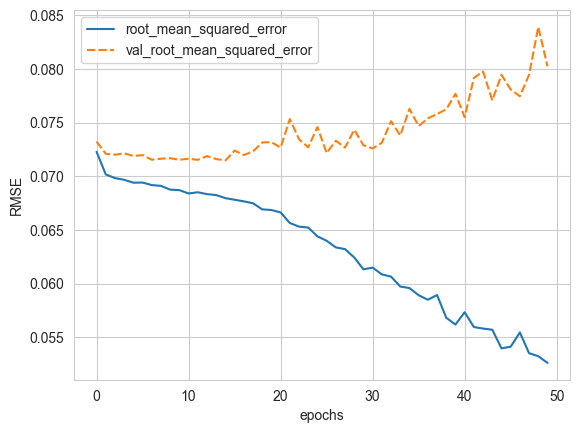

In [181]:
sns.set_style("whitegrid")
sns.lineplot(pd.DataFrame(history.history).iloc[:, [1, 3]])
plt.xlabel("epochs")
plt.ylabel("RMSE")
plt.show()

In [182]:
y_hat = model.predict(valid_X)

69/69 [==============================] - 1s 3ms/step


In [183]:
index = np.where(scaler.feature_names_in_ == 'PRECIPITATION AMOUNT (mm)')[0][0]

y_hat = y_hat * scaler.data_range_[index] + scaler.data_min_[index]
valid_y = valid_y * scaler.data_range_[index] + scaler.data_min_[index]

In [185]:
mean_squared_error(y_hat, valid_y, squared=False)

5.841840281674257

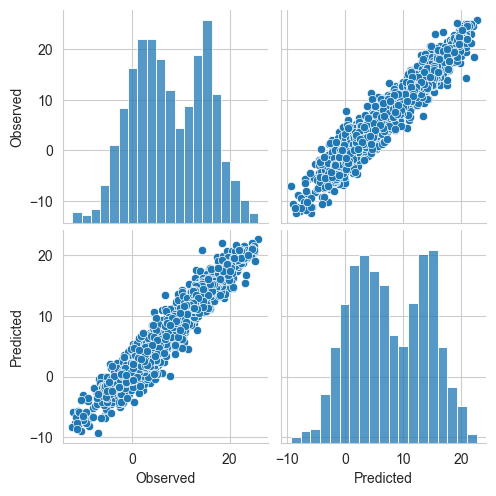

In [274]:
sns.pairplot(pd.DataFrame({'Observed':valid_y, 'Predicted':y_hat[:, 0]}))
plt.show()

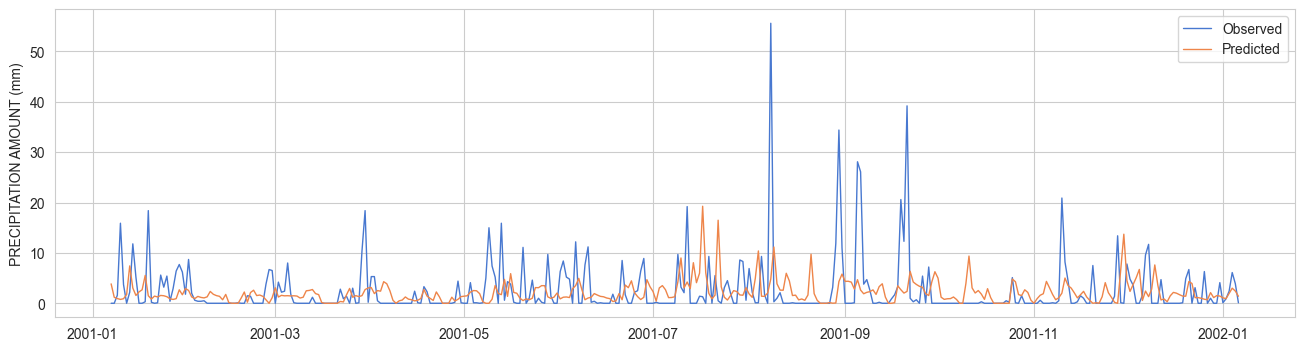

In [187]:
plt.figure(figsize=(16, 4))
sns.lineplot(pd.DataFrame({'Observed' : valid_y[:365], 'Predicted' : y_hat[:365].flatten()}, index=valid_t[:365]), palette='muted', dashes=False, lw=1)
plt.ylabel('PRECIPITATION AMOUNT (mm)')
plt.show()

<H3>Mean Temperature</H3>

In [188]:
pd.DataFrame({'Lag %d'%i : scaled['MEAN TEMPERATURE (C)'].shift(i).values for i in range(0, 10)}).dropna(axis=0).corr().style.background_gradient(cmap='coolwarm').format(precision=2)

,Lag 0,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Lag 6,Lag 7,Lag 8,Lag 9
Lag 0,1.00,0.96,0.93,0.91,0.89,0.88,0.87,0.86,0.85,0.84
Lag 1,0.96,1.00,0.96,0.93,0.91,0.89,0.88,0.87,0.86,0.85
Lag 2,0.93,0.96,1.00,0.96,0.93,0.91,0.89,0.88,0.87,0.86
Lag 3,0.91,0.93,0.96,1.00,0.96,0.93,0.91,0.89,0.88,0.87
Lag 4,0.89,0.91,0.93,0.96,1.00,0.96,0.93,0.91,0.89,0.88
Lag 5,0.88,0.89,0.91,0.93,0.96,1.00,0.96,0.93,0.91,0.89
Lag 6,0.87,0.88,0.89,0.91,0.93,0.96,1.00,0.96,0.93,0.91
Lag 7,0.86,0.87,0.88,0.89,0.91,0.93,0.96,1.00,0.96,0.93
Lag 8,0.85,0.86,0.87,0.88,0.89,0.91,0.93,0.96,1.00,0.96
Lag 9,0.84,0.85,0.86,0.87,0.88,0.89,0.91,0.93,0.96,1.00


In [363]:
lag = 5

In [364]:
scaled['MEAN TEMPERATURE (C)'][:14]

DATE
1980-01-01    0.382046
1980-01-02    0.329854
1980-01-03    0.219207
1980-01-04    0.141962
1980-01-05    0.308977
1980-01-06    0.398747
1980-01-07    0.375783
1980-01-08    0.325678
1980-01-09    0.338205
1980-01-10    0.319415
1980-01-11    0.308977
1980-01-12    0.246347
1980-01-13    0.325678
1980-01-14    0.419624
Name: MEAN TEMPERATURE (C), dtype: float64

<B>Data Preparation</B>

In [365]:
X = window(scaled, lag)

In [366]:
X[:, :, 7][:7]

array([[0.38204593, 0.32985386, 0.21920668, 0.14196242, 0.30897704],
       [0.32985386, 0.21920668, 0.14196242, 0.30897704, 0.39874739],
       [0.21920668, 0.14196242, 0.30897704, 0.39874739, 0.37578288],
       [0.14196242, 0.30897704, 0.39874739, 0.37578288, 0.3256785 ],
       [0.30897704, 0.39874739, 0.37578288, 0.3256785 , 0.33820459],
       [0.39874739, 0.37578288, 0.3256785 , 0.33820459, 0.31941545],
       [0.37578288, 0.3256785 , 0.33820459, 0.31941545, 0.30897704]])

In [367]:
y = scaled['MEAN TEMPERATURE (C)'].shift(-lag).dropna().values
y[:7]

array([0.39874739, 0.37578288, 0.3256785 , 0.33820459, 0.31941545,
       0.30897704, 0.24634656])

In [368]:
t = scaled.index.values[lag:]
t[:7]

array(['1980-01-06T00:00:00.000000000', '1980-01-07T00:00:00.000000000',
       '1980-01-08T00:00:00.000000000', '1980-01-09T00:00:00.000000000',
       '1980-01-10T00:00:00.000000000', '1980-01-11T00:00:00.000000000',
       '1980-01-12T00:00:00.000000000'], dtype='datetime64[ns]')

In [369]:
X.shape, y.shape, t.shape

((14972, 5, 35), (14971,), (14971,))

In [370]:
X = X[: y.shape[0]]

In [371]:
X.shape, y.shape, t.shape

((14971, 5, 35), (14971,), (14971,))

In [372]:
train_size = X.shape[0] * 7 // 10

<B>Define and Fit Model</B>

In [373]:
train_X, valid_X, valid_t = X[:train_size], X[train_size:], t[train_size:]

In [374]:
train_y, valid_y = y[:train_size], y[train_size:]

In [375]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(LSTM(6, input_shape=(X.shape[1], X.shape[2]), return_sequences=False))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [376]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6)                 1008      
                                                                 
 dense (Dense)               (None, 1)                 7         
                                                                 
Total params: 1015 (3.96 KB)
Trainable params: 1015 (3.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [377]:
history = model.fit(x=train_X, y=train_y, epochs=500, validation_data=(valid_X, valid_y), verbose=0, shuffle=False)

<B>Evaluate Model</B>

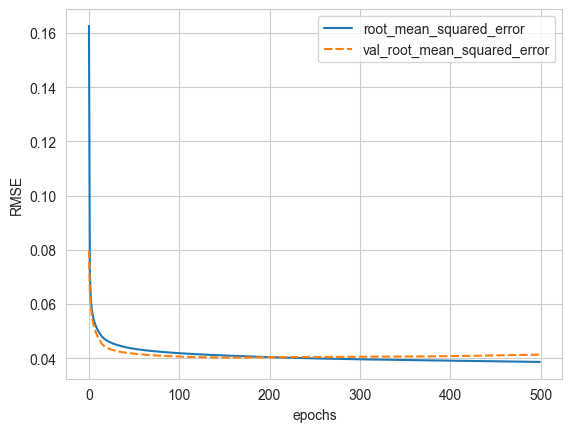

In [378]:
sns.set_style("whitegrid")
sns.lineplot(pd.DataFrame(history.history).iloc[:, [1, 3]])
plt.xlabel("epochs")
plt.ylabel("RMSE")
plt.show()

In [379]:
y_hat = model.predict(valid_X)

141/141 [==============================] - 1s 2ms/step


In [380]:
index = np.where(scaler.feature_names_in_ == 'MEAN TEMPERATURE (C)')[0][0]

y_hat = y_hat * scaler.data_range_[index] + scaler.data_min_[index]
valid_y = valid_y * scaler.data_range_[index] + scaler.data_min_[index]

In [381]:
mean_squared_error(y_hat, valid_y, squared=False)

1.9803193075317869

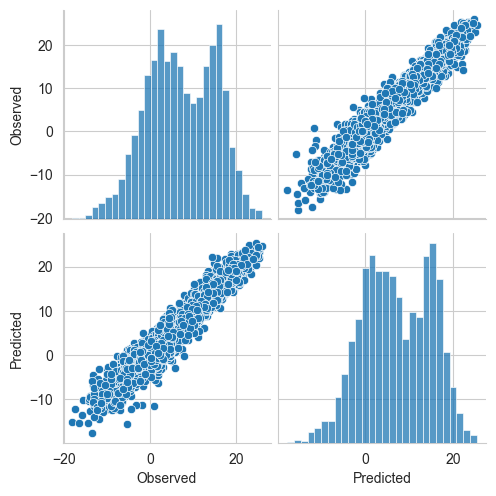

In [382]:
sns.pairplot(pd.DataFrame({'Observed':valid_y, 'Predicted':y_hat[:, 0]}))
plt.show()

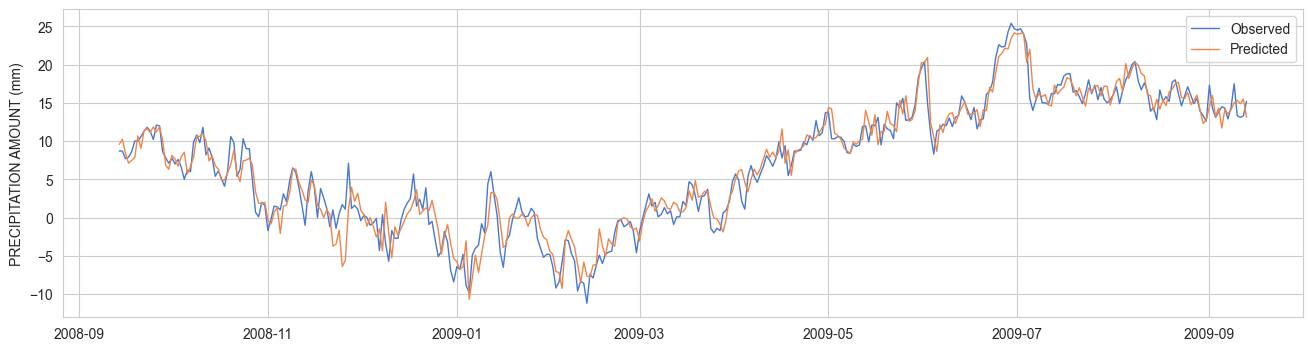

In [383]:
plt.figure(figsize=(16, 4))
sns.lineplot(pd.DataFrame({'Observed' : valid_y[:365], 'Predicted' : y_hat[:365, 0]}, index=valid_t[:365]), palette='muted', dashes=False, lw=1)
plt.ylabel('PRECIPITATION AMOUNT (mm)')
plt.show()